<a href="https://colab.research.google.com/github/licTomasPerez/Spin-Chains-/blob/main/Heisenberg_Model_Wave_packet_Qutip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
N = 5
id2 = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
    
sx_list = []
sy_list = []
sz_list = []
one_half_list = []
num_expression_sz = []
denom_expression_sz = []

for n in range(N):
    operator_list = []
    for m in range(N):
      operator_list.append(id2)
        
    operator_list[n] = sx
    sx_list.append(tensor(operator_list))
        
    operator_list[n] = sy
    sy_list.append(tensor(operator_list))
        
    operator_list[n] = sz
    sz_list.append(tensor(operator_list))
    
    
for n in range(N):
    one_half_list.append(0.5)
for n in range(N):
    num_expression_sz.append((sz_list[n] + one_half_list[n])*n)
    denom_expression_sz.append((sz_list[n] + one_half_list[n]))

sum_num_expression_sz = 0
sum_denom_expression_sz = 0
for n in range(N):
  sum_num_expression_sz += num_expression_sz[n]
  sum_denom_expression_sz += denom_expression_sz[n]
print(sum_denom_expression_sz)

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = True
Qobj data =
[[ 7.5  0.   0.  ...  0.   0.   0. ]
 [ 0.   5.5  0.  ...  0.   0.   0. ]
 [ 0.   0.   5.5 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ... -0.5  0.   0. ]
 [ 0.   0.   0.  ...  0.  -0.5  0. ]
 [ 0.   0.   0.  ...  0.   0.  -2.5]]


In [88]:
a_list = [1,2,3]
b = 10
b_list = []
c_list = []
for i in range(3):
  b_list.append(b)

for i in range(3):
  c_list.append(a_list[i]/b_list[i])

c_list

[0.1, 0.2, 0.3]

In [159]:
from numpy import * 
sz_expt = random.rand(1,7)
sz_expt


array([[0.35145395, 0.86966251, 0.47610851, 0.79993239, 0.40160638,
        0.95271358, 0.86665222]])

In [87]:
N = 5
id2 = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
    
sx_list = []
sy_list = []
sz_list = []
one_half_list = .5 * np.ones(N)
num_expression_sz = []

for n in range(N):
    operator_list = []
    for m in range(N):
      operator_list.append(id2)
        
    operator_list[n] = sx
    sx_list.append(tensor(operator_list))
        
    operator_list[n] = sy
    sy_list.append(tensor(operator_list))
        
    operator_list[n] = sz
    sz_list.append(tensor(operator_list))
    
    
for n in range(N):
    one_half_list.append(0.5)
for n in range(N):
    num_expression_sz.append((sz_list[n] + one_half_list[n])*n)
print(num_expression_sz)

AttributeError: ignored

## Heisenberg Model

The Heisenberg Hamiltonian is given by

$${{\hat {H}_H}=-{\frac {1}{2}}\sum _{j=1}^{N}(J_{x}\sigma _{j}^{x}\sigma _{j+1}^{x}+J_{y}\sigma _{j}^{y}\sigma _{j+1}^{y}+J_{z}\sigma _{j}^{z}\sigma _{j+1}^{z}+h\sigma _{j}^{z})}$$

where $J_{a}, a \in {x,y,z}$ are real-valued constants and where the Pauli operators follow the standard $SU(2)$ conmutation algebra: $$[\sigma^a_i, \sigma^b_j]=i \delta_{ij}\epsilon^{abc}\sigma^c$$. 

In particular we are interested in the XYZ Heisenberg model \textit{ie.} $J_x \neq J_y \neq J_z$


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [171]:
### XYZ Heisenberg model

solver = "me"   
N = 5            # número de spines

h  = 1.0 * 2 * np.pi * np.ones(N) 
Jz = 0.1 * 2 * np.pi * np.ones(N)
Jx = 0.15 * 2 * np.pi * np.ones(N)
Jy = 0.2 * 2 * np.pi * np.ones(N)

In [173]:
def hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver):
    
    id2 = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    
    sx_list = []
    sy_list = []
    sz_list = []
    one_half_list = []
    num_expression_sz = []

    for n in range(N):
        operator_list = []
        for m in range(N):
            operator_list.append(id2)
        
        operator_list[n] = sx
        sx_list.append(tensor(operator_list))
        
        operator_list[n] = sy
        sy_list.append(tensor(operator_list))
        
        operator_list[n] = sz
        sz_list.append(tensor(operator_list))

    # Constructing the Hamiltonian
    
    H = 0
    
    for n in range(N):
        H += -0.5*h[n]*sz_list[n]
        
    for n in range(N-1):
        H += -0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += -0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += -0.5 * Jz[n] * sz_list[n] * sz_list[n+1]
    
    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])
    
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, sz_list)
    elif solver == "mc":
        ntraj = 200 
        result = mcsolve(H, psi0, tlist, c_op_list, sz_list, ntraj)

    return result.expect



In [174]:
# dephasing rate
gamma = 5 * 10**-10 * np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
psi_list.append(basis(2,1))
for n in range(N-1):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 20, 200)

sz_expt = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)


Here we are interested in computing the following expression

$$
\mu_X = \frac{\bigg(\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}\bigg)i}{\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}}
$$

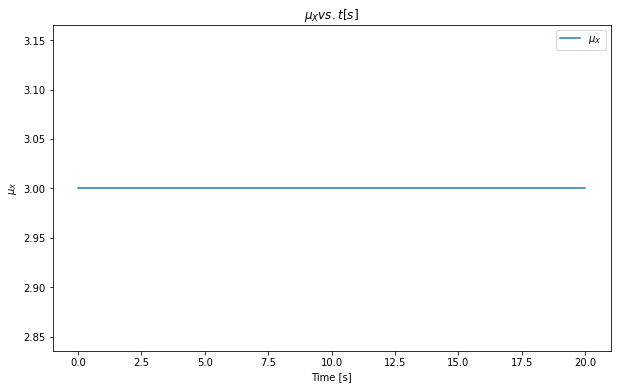

In [229]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(tlist, muX, label=r'$\mu_X$')

ax.legend(loc=0)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'$\mu_X$')
ax.set_title(r'$\mu_X  vs. t[s]$');

In [13]:
Çfrom qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.7.0
Numpy,1.21.6
SciPy,1.4.1
matplotlib,3.2.2
Cython,0.29.28
Number of CPUs,2
BLAS Info,OPENBLAS
IPython,5.5.0
Python,"3.7.13 (default, Mar 16 2022, 17:37:17) [GCC 7.5.0]"
OS,posix [linux]


In [28]:
def hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver):
    
    id2 = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    
    sx_list = []
    sy_list = []
    sz_list = []
    
    for n in range(N):
        operator_list = []
        for m in range(N):
            operator_list.append(id2)
        
        operator_list[n] = sx
        sx_list.append(tensor(operator_list))
        
        operator_list[n] = sy
        sy_list.append(tensor(operator_list))
        
        operator_list[n] = sz
        sz_list.append(tensor(operator_list))
    
    # Constructing the Hamiltonian
    
    H = 0
    
    for n in range(N):
        H += -0.5*h[n]*sz_list[n]
        
    for n in range(N-1):
        H += -0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += -0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += -0.5 * Jz[n] * sz_list[n] * sz_list[n+1]
    
    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])
    
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, sz_list)
    elif solver == "mc":
        ntraj = 200 
        result = mcsolve(H, psi0, tlist, c_op_list, sz_list, ntraj)

    return result.expect

In [29]:
# dephasing rate
gamma = 5 * 10**-10 * np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
psi_list.append(basis(2,1))
for n in range(N-1):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 20, 200)

sz_expt = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)


In [89]:
sz_expt[1]

array([1.        , 0.97535173, 0.90448211, 0.79536967, 0.65877142,
       0.5073694 , 0.35555717, 0.21807907, 0.10774451, 0.03381545,
       0.00154883, 0.0121911 , 0.06300446, 0.14750677, 0.25626647,
       0.37842635, 0.5034101 , 0.62177449, 0.72532642, 0.80787994,
       0.86662188, 0.90217395, 0.91711321, 0.91514911, 0.90134301,
       0.88123542, 0.85907963, 0.837845  , 0.82041407, 0.8087829 ,
       0.80219987, 0.79810828, 0.7949923 , 0.79272691, 0.79062003,
       0.78713433, 0.78165711, 0.77527192, 0.76978949, 0.76671466,
       0.76685235, 0.77031734, 0.77686572, 0.78605651, 0.7968867 ,
       0.80764067, 0.81640304, 0.82153433, 0.82191369, 0.8174482 ,
       0.8093327 , 0.79932581, 0.7890071 , 0.78011036, 0.77491627,
       0.77537928, 0.78186471, 0.7931059 , 0.80709536, 0.82143237,
       0.8329563 , 0.83790683, 0.83301624, 0.81641442, 0.7877344 ,
       0.74818374, 0.70079126, 0.64997433, 0.60069414, 0.55839565,
       0.52907014, 0.51781317, 0.52687059, 0.55560244, 0.60197

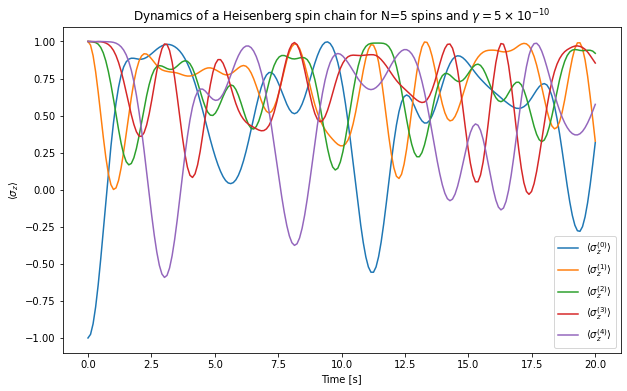

In [33]:
fig, ax = plt.subplots(figsize=(10,6))

for n in range(N):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain for N=5 spins and $\gamma = 5\times 10^{-10} $');